In [1]:
//%jsroot on

In [2]:
const double PPAC3_Z = -84.2-188;
const double PPAC2_Z = -206.2-188;
const double PPAC1_Z = -504.2-188;

In [3]:
int start = 460;
int stop = 460;
TChain *fch;
fch = new TChain("tree", "tele");
for (int i= start; i<=stop; i++){
  TString fileName = TString::Format("/data/d1/zhuhy/lanzhou2022/getdatappac/newtestn15_2/tele%04d.root" , i);
  //TString fileName = TString::Format("/data/d1/zhuhy/telefile/tele%04d.root" , i);
  fch->AddFile(fileName.Data());}

TCanvas *c1=new TCanvas;

In [4]:
void SetTrace(TH2I *h,Double_t k,Double_t b){
        if(h==0) return;

        Int_t nbin  = h->GetNbinsX();
        Double_t zmin = h->GetXaxis()->GetXmin();
        Double_t zmax = h->GetXaxis()->GetXmax();
        for(int i=0;i<nbin;i++){
                Double_t nowz = zmin+(zmax-zmin)*i/nbin;
                Double_t nowf = nowz*k+b;
                h->Fill(nowz,nowf);
        }
}


In [5]:
   Double_t xzTrack[3] = {PPAC1_Z,PPAC2_Z,PPAC3_Z};
   Double_t yzTrack[3] = {PPAC1_Z,PPAC2_Z,PPAC3_Z};
   Double_t xTrack[3]={0,0,0};
   Double_t yTrack[3]={0,0,0};
   Double_t tx,ty;

   Double_t xfpx[3],xfpy[3],xpCh[3][5][2];
   TBranch        *b_xfpx;   //!
   TBranch        *b_xfpy;   //!
   TBranch        *b_xpCh;   //!

        TH2I* hxz = new TH2I("hxz","Projection of X-Z",200,-750,200,200,-60,60);
        hxz->SetStats(kFALSE);
        TH2I* hyz = new TH2I("hyz","Projection of Y-Z",200,-750,200,200,-60,60);
        hyz->SetStats(kFALSE);

In [6]:
   fch->SetBranchAddress("xfpx[3]", xfpx, &b_xfpx);
   fch->SetBranchAddress("xfpy[3]", xfpy, &b_xfpy);
   fch->SetBranchAddress("xpCh[3][5][2]", xpCh, &b_xpCh);

In [7]:
   Long64_t nentries = fch->GetEntries();
   for (Long64_t jentry=0; jentry<nentries;jentry++) {
        if(jentry%(20000)==0)cout<<jentry<<"/"<<nentries<<'\n';
        if(jentry>20000*1)break;
            fch->GetEntry(jentry);
            for(Int_t ii=0;ii<3;ii++){xTrack[ii]=0;yTrack[ii]=0;}
            for(Int_t ii=0;ii<3;ii++){
                xTrack[ii]=xfpx[ii];
                yTrack[ii]=-xfpy[ii];   
            }
                if(xTrack[0]&&xTrack[0]&&xTrack[0]){
                        TGraph *grXTrace = new TGraph(3,xzTrack,xTrack);
                        TF1 *fXTrace = new TF1("fXTrace","pol1",-800,200);
                        grXTrace->Fit(fXTrace,"q+");
                        //tx = fXTrace->Eval(0);
                        SetTrace(hxz,fXTrace->GetParameter(1),fXTrace->GetParameter(0));
                        delete grXTrace;
                        delete fXTrace;
                }
                if(yTrack[0]&&yTrack[0]&&yTrack[0]){
                        TGraph *grYTrace = new TGraph(3,yzTrack,yTrack);
                        TF1 *fYTrace = new TF1("fYTrace","pol1",-800,200);
                        grYTrace->Fit(fYTrace,"q+");
                        //ty = fYTrace->Eval(0);
                        SetTrace(hyz,fYTrace->GetParameter(1),fYTrace->GetParameter(0));
                        delete grYTrace;
                        delete fYTrace;
                }
   }

0/91261
20000/91261


In [8]:
  //PPAC1 draw
  TLine *nppac[3];
  for(Int_t i=0;i<3;i++){
  nppac[i] = new TLine(xzTrack[i],-30,xzTrack[i],30);
  nppac[i]->SetLineWidth(5);
  nppac[i]->SetLineColor(1);
  }
  //Target draw
  TLine *target=new TLine(0,-15,0,15);
  target->SetLineWidth(5);
  target->SetLineColor(2);
  //Target draw
  TLine *t0=new TLine(111.76,-32,111.76,32);
  t0->SetLineWidth(5);
  t0->SetLineColor(1);

//100 111.76 123.52

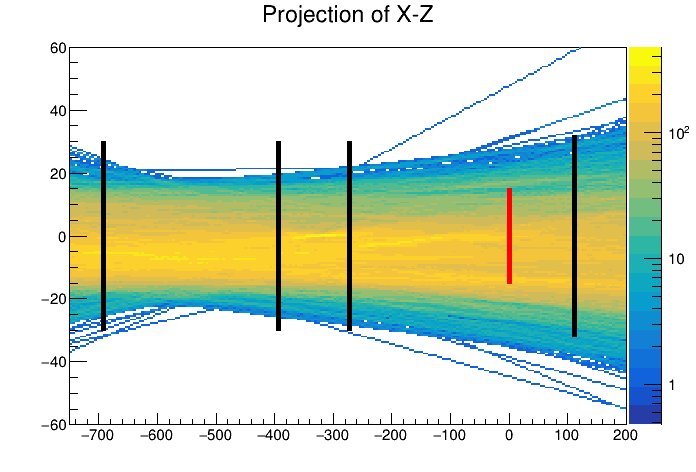

In [9]:
c1->Clear();
c1->SetLogz();
hxz->Draw("colz");
for(Int_t i=0;i<3;i++)nppac[i]->Draw();
target->Draw();
t0->Draw();
c1->Draw();

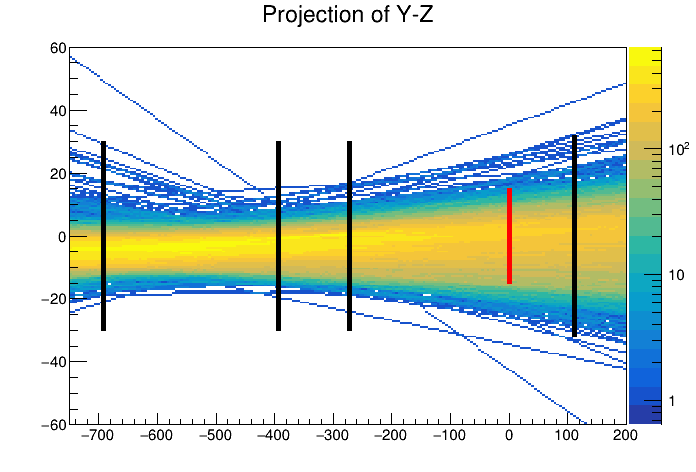

In [10]:
c1->Clear();
c1->SetLogz();
hyz->Draw("colz");
for(Int_t i=0;i<3;i++)nppac[i]->Draw();
target->Draw();
t0->Draw();
c1->Draw();

##### 